In [23]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, confusion_matrix, accuracy_score, f1_score, precision_score
import time
from sklearn.neural_network import MLPClassifier
from sklearn import ensemble
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from my_functions import *

In [2]:
df_train = pd.read_csv('Data/SPECT.train')
df_test = pd.read_csv('Data/SPECT.test')

In [3]:
df_test

,1,1.1,0,0.1,1.2,1.3,0.2,0.3,0.4,1.4,...,0.7,1.6,1.7,1.8,0.8,0.9,1.9,1.10,0.10,0.11
0,1,1,0,0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,1,0,1,0,0,1,...,0,1,1,0,0,0,0,0,0,1
2,1,0,1,1,1,0,0,1,0,1,...,1,1,0,1,0,0,0,0,1,0
3,1,0,0,1,0,0,0,0,1,0,...,1,1,0,1,0,0,0,0,0,1
4,1,0,0,1,1,0,1,0,0,1,...,1,0,0,1,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
182,0,1,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
183,0,1,0,1,0,1,0,0,1,0,...,1,0,1,1,0,0,0,0,0,0
184,0,1,0,1,0,1,0,0,1,1,...,0,1,0,1,0,0,0,0,0,0


In [4]:
df_train

,1,0,0.1,0.2,1.1,0.3,0.4,0.5,1.2,1.3,...,1.4,1.5,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16
0,1,0,0,1,1,0,0,0,1,1,...,1,1,0,0,0,0,0,0,0,1
1,1,1,0,1,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
3,1,0,0,0,0,0,0,0,1,0,...,1,0,1,1,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,1,...,1,1,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
75,0,1,0,0,0,1,1,0,0,1,...,0,1,0,0,0,0,1,1,0,0
76,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
77,0,0,0,1,1,0,0,1,0,0,...,1,1,0,0,0,0,0,0,1,1


In [5]:
df = pd.DataFrame(np.vstack((df_train,df_test)), columns=df_train.columns)
df.columns = ['target', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9',
       'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18',
       'f19', 'f20', 'f21', 'f22']
df

,target,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22
0,1,0,0,1,1,0,0,0,1,1,...,1,1,0,0,0,0,0,0,0,1
1,1,1,0,1,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
3,1,0,0,0,0,0,0,0,1,0,...,1,0,1,1,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,1,...,1,1,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
261,0,1,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
262,0,1,0,1,0,1,0,0,1,0,...,1,0,1,1,0,0,0,0,0,0
263,0,1,0,1,0,1,0,0,1,1,...,0,1,0,1,0,0,0,0,0,0


In [6]:
df['target'].value_counts()

1    210
0     55
Name: target, dtype: int64

In [7]:
train = df.drop('target',axis=1)

In [8]:
def RFfunc(x_train1, x_test1, y_train1, y_test1):
    clf = ensemble.RandomForestClassifier(n_jobs = -1, n_estimators=200, random_state=42)
    clf.fit(x_train1, y_train1)
    probs = clf.predict_proba(x_test1)[:,1]
    f1, apr, acc, auc = matrix_info(0.6651,y_test1, probs)
    return round(f1,3), round(apr,3), round(acc,3), round(auc,3)

In [9]:
def MLPfunc(x_train1, x_test1, y_train1, y_test1):
    mlp = MLPClassifier(solver='lbfgs', activation='relu', alpha=0.1, hidden_layer_sizes = (16,16), max_iter = 10000)
    mlp.fit(x_train1, y_train1)
    probs = mlp.predict_proba(x_test1)[:,1]
    f1, apr, acc, auc = matrix_info(0.77, y_test1, probs)
    return round(f1,3), round(apr,3), round(acc,3), round(auc,3)

In [10]:
def SVMfunc(x_train1, x_test1, y_train1, y_test1):
    svc = SVC(C = 0.1, degree = 2, gamma = 0.04, kernel = 'rbf', max_iter =  100000, probability = True)
    svc.fit(x_train1, y_train1)
    probs = svc.predict_proba(x_test1)[:,1]
    f1, apr, acc, auc = matrix_info(0.7521,y_test1, probs)
    return round(f1,3), round(apr,3), round(acc,3), round(auc,3)

In [11]:
X_train = np.array(df)[:,1:]
Y_train = df['target'].values
X_train,Y_train = shuffle(X_train, Y_train)

In [14]:
X_train = np.array(df)[:,1:]
Y_train = df['target'].values
X_train,Y_train = shuffle(X_train, Y_train)
rf = np.empty([9, 7])
mlp = np.empty([9, 7])
svm = np.empty([9, 7])
test_sizes = [0.2,0.5,0.8]
j = 0
start1 = time.time()
for size in test_sizes:
    for i in np.arange(3):
        x_train1, x_test1, y_train1, y_test1 = train_test_split(X_train, Y_train, test_size=size)
        
        rf_time = time.time()
        rf_f1, rf_apr, rf_acc, rf_auc = RFfunc(x_train1, x_test1, y_train1, y_test1)
        rf_time = time.time() - rf_time
        
        mlp_time = time.time()
        mlp_f1, mlp_apr, mlp_acc, mlp_auc = MLPfunc(x_train1, x_test1, y_train1, y_test1)
        mlp_time = time.time() - mlp_time
        
        svm_time = time.time()
        svm_f1, svm_apr, svm_acc, svm_auc = SVMfunc(x_train1, x_test1, y_train1, y_test1)
        svm_time = time.time() - svm_time
        
        
        rf[j] = [rf_f1, rf_apr, rf_acc, rf_auc, i, size, rf_time]
        mlp[j] = [mlp_f1, mlp_apr, mlp_acc, mlp_auc, i, size, mlp_time]
        svm[j] = [svm_f1, svm_apr, svm_acc, svm_auc, i, size, svm_time]
        j = j + 1

now1 = time.time()
print('Elapsed Time: ' + str(int(now-start)) + ' seconds')

f1_score:
0.7579908675799087
precision_score:
0.7446969696969697
accuracy_score:
0.7924528301886793
Confusion Matrix:
[[11  2]
 [ 9 31]]
              precision    recall  f1-score   support

           0       0.55      0.85      0.67        13
           1       0.94      0.78      0.85        40

    accuracy                           0.79        53
   macro avg       0.74      0.81      0.76        53
weighted avg       0.84      0.79      0.80        53

f1_score:
0.7948387096774194
precision_score:
0.776984126984127
accuracy_score:
0.8301886792452831
Confusion Matrix:
[[11  2]
 [ 7 33]]
              precision    recall  f1-score   support

           0       0.61      0.85      0.71        13
           1       0.94      0.82      0.88        40

    accuracy                           0.83        53
   macro avg       0.78      0.84      0.79        53
weighted avg       0.86      0.83      0.84        53

f1_score:
0.7401960784313726
precision_score:
0.7306547619047619
accuracy

f1_score:
0.690171720862258
precision_score:
0.6744086021505377
accuracy_score:
0.7735849056603774
Confusion Matrix:
[[ 27  13]
 [ 35 137]]
              precision    recall  f1-score   support

           0       0.44      0.68      0.53        40
           1       0.91      0.80      0.85       172

    accuracy                           0.77       212
   macro avg       0.67      0.74      0.69       212
weighted avg       0.82      0.77      0.79       212

f1_score:
0.6945713147166109
precision_score:
0.678265117793942
accuracy_score:
0.7783018867924528
Confusion Matrix:
[[ 27  13]
 [ 34 138]]
              precision    recall  f1-score   support

           0       0.44      0.68      0.53        40
           1       0.91      0.80      0.85       172

    accuracy                           0.78       212
   macro avg       0.68      0.74      0.69       212
weighted avg       0.82      0.78      0.79       212

f1_score:
0.7197115384615385
precision_score:
0.7005912162162162
a

NameError: name 'now' is not defined

In [31]:
rf_df = pd.DataFrame(rf, columns = ['f1', 'apr', 'acc', 'auc', 'trial', 'test_size','time'])
mlp_df = pd.DataFrame(mlp, columns = ['f1', 'apr', 'acc', 'auc', 'trial', 'test_size','time'])
svm_df = pd.DataFrame(svm, columns = ['f1', 'apr', 'acc', 'auc', 'trial', 'test_size','time'])
rf_df['avg'] = round(rf_df.drop(['trial','test_size','time'],axis=1).mean(axis=1),3).values
mlp_df['avg'] = round(mlp_df.drop(['trial','test_size','time'],axis=1).mean(axis=1),3).values
svm_df['avg'] = round(svm_df.drop(['trial','test_size','time'],axis=1).mean(axis=1),3).values
mlp_mean = round(mlp_df.groupby('test_size').mean(),3).drop('trial', axis = 1)
rf_mean = round(rf_df.groupby('test_size').mean(),3).drop('trial', axis = 1)
svm_mean = round(svm_df.groupby('test_size').mean(),3).drop('trial', axis = 1)
rf_mean['avg'] = round(rf_mean.drop('time',axis=1).mean(axis=1),3).values
mlp_mean['avg'] = round(mlp_mean.drop('time',axis=1).mean(axis=1),3).values
svm_mean['avg'] = round(svm_mean.drop('time',axis=1).mean(axis=1),3).values

rf_mean['avg_std'] = round(rf_df.groupby('test_size').std(),3)['avg'].values
mlp_mean['avg_std'] = round(mlp_df.groupby('test_size').std(),3)['avg'].values
svm_mean['avg_std'] = round(svm_df.groupby('test_size').std(),3)['avg'].values

In [32]:
mlp_mean

,f1,apr,acc,auc,time,avg,avg_std
test_size,,,,,,,
0.2,0.747,0.743,0.786,0.761,0.698,0.759,0.040
0.5,0.675,0.676,0.734,0.787,1.220,0.718,0.041
0.8,0.701,0.691,0.765,0.795,0.333,0.738,0.020


In [22]:
svm_mean.time.values

array([0.038, 0.029, 0.03 ])

In [24]:
mlp_mean.time.values

array([0.698, 1.22 , 0.333])

In [21]:
svm_mean

,f1,apr,acc,auc,time,avg,avg_std
test_size,,,,,,,
0.2,0.747,0.783,0.805,0.784,0.038,0.656,0.049
0.5,0.740,0.724,0.815,0.849,0.029,0.656,0.009
0.8,0.688,0.677,0.748,0.769,0.030,0.605,0.053


In [18]:
rf_mean

,f1,apr,acc,auc,time,avg,avg_std
test_size,,,,,,,
0.2,0.745,0.785,0.805,0.748,0.667,0.754,0.034
0.5,0.715,0.704,0.784,0.811,0.653,0.737,0.038
0.8,0.708,0.697,0.772,0.823,0.783,0.756,0.025


In [135]:
mlp_df

,f1,apr,acc,auc,trial,test_size
0,0.795,0.790,0.830,0.801,0.0,0.2
1,0.663,0.660,0.698,0.689,1.0,0.2
2,0.768,0.749,0.811,0.819,2.0,0.2
3,0.678,0.672,0.729,0.731,0.0,0.5
4,0.571,0.618,0.632,0.741,1.0,0.5
5,0.697,0.695,0.737,0.771,2.0,0.5
6,0.550,0.625,0.575,0.700,0.0,0.8
7,0.666,0.660,0.726,0.727,1.0,0.8
8,0.722,0.759,0.840,0.700,2.0,0.8


In [14]:
X_train.shape

(265, 22)

In [20]:
(X_train.shape[0]/5)*4

212.0

In [21]:
(X_train.shape[0]/5)

53.0

In [15]:
Y_train.shape

(265,)

In [42]:
np.unique(Y_train, return_counts = True)

(array([0, 1], dtype=int64), array([ 55, 210], dtype=int64))

In [34]:
kf = KFold(n_splits=5, shuffle = True)
rf = np.empty([5, 4])
mlp = np.empty([5, 4])
svm = np.empty([5, 4])
j = 0
for train_index, test_index in kf.split(X_train, Y_train):
    x_train = X_train[train_index]
    y_train = Y_train[train_index]
    
    x_test = X_train[test_index]
    y_test = Y_train[test_index]
        
    start = time.time()
    rf_f1, rf_apr, rf_acc, rf_auc = RFfunc(x_train, x_test, y_train, y_test)
    mlp_f1, mlp_apr, mlp_acc, mlp_auc = MLPfunc(x_train, x_test, y_train, y_test)
    svm_f1, svm_apr, svm_acc, svm_auc = SVMfunc(x_train, x_test, y_train, y_test)
 
    now = time.time()
    print('Elapsed Time: ' + str(int(now-start)) + ' seconds')
    rf[j] = [rf_f1, rf_apr, rf_acc, rf_auc]
    mlp[j] = [mlp_f1, mlp_apr, mlp_acc, mlp_auc]
    svm[j] = [svm_f1, svm_apr, svm_acc, svm_auc]
    j = j + 1

f1_score:
0.7132034632034632
precision_score:
0.7012195121951219
accuracy_score:
0.8113207547169812
Confusion Matrix:
[[ 6  4]
 [ 6 37]]
              precision    recall  f1-score   support

           0       0.50      0.60      0.55        10
           1       0.90      0.86      0.88        43

    accuracy                           0.81        53
   macro avg       0.70      0.73      0.71        53
weighted avg       0.83      0.81      0.82        53

f1_score:
0.6102941176470588
precision_score:
0.632183908045977
accuracy_score:
0.660377358490566
Confusion Matrix:
[[ 8  2]
 [16 27]]
              precision    recall  f1-score   support

           0       0.33      0.80      0.47        10
           1       0.93      0.63      0.75        43

    accuracy                           0.66        53
   macro avg       0.63      0.71      0.61        53
weighted avg       0.82      0.66      0.70        53

f1_score:
0.7644444444444445
precision_score:
0.7403508771929824
accuracy_

In [35]:
rf_stats = pd.DataFrame(rf, columns = ['f1', 'apr', 'acc', 'auc'])
mlp_stats = pd.DataFrame(mlp, columns = ['f1', 'apr', 'acc', 'auc'])
svm_stats = pd.DataFrame(svm, columns = ['f1', 'apr', 'acc', 'auc'])
rf_stats['avg'] = rf_stats.mean(axis=1).values
mlp_stats['avg'] = mlp_stats.mean(axis=1).values
svm_stats['avg'] = svm_stats.mean(axis=1).values

In [36]:
rf_stats

,f1,apr,acc,auc,avg
0,0.713,0.701,0.811,0.720,0.73625
1,0.753,0.753,0.887,0.752,0.78625
2,0.745,0.760,0.811,0.772,0.77200
3,0.765,0.754,0.792,0.814,0.78125
4,0.727,0.708,0.792,0.806,0.75825


In [37]:
round(rf_stats.mean(),3)

f1     0.741
apr    0.735
acc    0.819
auc    0.773
avg    0.767
dtype: float64

In [38]:
mlp_stats

,f1,apr,acc,auc,avg
0,0.610,0.632,0.660,0.670,0.64300
1,0.523,0.617,0.566,0.773,0.61975
2,0.730,0.728,0.755,0.794,0.75175
3,0.783,0.770,0.811,0.843,0.80175
4,0.727,0.708,0.792,0.794,0.75525


In [39]:
round(mlp_stats.mean(),3)

f1     0.675
apr    0.691
acc    0.717
auc    0.775
avg    0.714
dtype: float64

In [40]:
svm_stats

,f1,apr,acc,auc,avg
0,0.764,0.740,0.830,0.827,0.79025
1,0.660,0.652,0.755,0.783,0.71250
2,0.826,0.835,0.868,0.882,0.85275
3,0.840,0.825,0.868,0.878,0.85275
4,0.866,0.904,0.925,0.892,0.89675


In [41]:
round(svm_stats.mean(),3)

f1     0.791
apr    0.791
acc    0.849
auc    0.852
avg    0.821
dtype: float64

In [73]:
X_train = np.array(df)[:,1:]
Y_train = df['target'].values
x_train1, x_test1, y_train1, y_test1 = train_test_split(X_train, Y_train, test_size=0.5)

Elapsed Time: 0 seconds
max(tpr - fpr) w/ th =  0.66514010989011


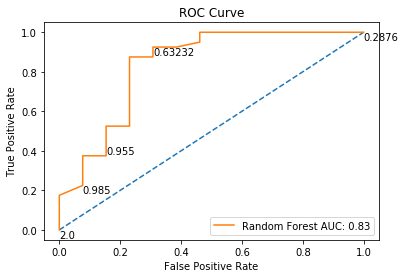

In [36]:
start = time.time()
clf = ensemble.RandomForestClassifier(n_jobs = -1, n_estimators=200, random_state=42)
clf.fit(x_train1, y_train1)

now = time.time()
print('Elapsed Time: ' + str(int(now-start)) + ' seconds')

x_train1.shape

probs = clf.predict_proba(x_test1)[:,1]

plot_roc(y_test1, probs, 'Random Forest')

In [41]:
matrix_info(0.6651,y_test1, probs)

f1_score:
0.8058608058608059
precision_score:
0.7938596491228069
accuracy_score:
0.8490566037735849
Confusion Matrix:
[[10  3]
 [ 5 35]]
              precision    recall  f1-score   support

           0       0.67      0.77      0.71        13
           1       0.92      0.88      0.90        40

    accuracy                           0.85        53
   macro avg       0.79      0.82      0.81        53
weighted avg       0.86      0.85      0.85        53



In [87]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X_train, Y_train, test_size=0.5)

In [95]:
X_train = np.array(df)[:,1:]
Y_train = df['target'].values
x_train1, x_test1, y_train1, y_test1 = train_test_split(X_train, Y_train, test_size=0.5)

mlp = MLPClassifier(solver='adam', activation='relu', alpha=0.1, hidden_layer_sizes = (1,10), max_iter = 10000)
mlp.fit(x_train1, y_train1)

probs_nn = mlp.predict_proba(x_test1)[:,1]

max(tpr - fpr) w/ th =  0.9788439869349386


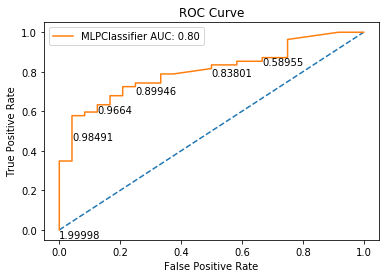

f1_score:
0.6114736776679719
precision_score:
0.6588541666666666
accuracy_score:
0.6466165413533834
Confusion Matrix:
[[23  1]
 [46 63]]
              precision    recall  f1-score   support

           0       0.33      0.96      0.49        24
           1       0.98      0.58      0.73       109

    accuracy                           0.65       133
   macro avg       0.66      0.77      0.61       133
weighted avg       0.87      0.65      0.69       133



(0.6114736776679719, 0.6588541666666666, 0.6466165413533834, 0.76815749235474)

In [96]:
plot_roc(y_test1, probs_nn, 'MLPClassifier')

matrix_info(0.4, y_test1, probs_nn)

In [31]:
start = time.time()

svc = SVC(C = 0.1, degree = 2, gamma = 0.04, kernel = 'rbf', max_iter =  100000, probability = True)
svc.fit(x_train1,y_train1)
now = time.time()
print('Elapsed Time: ' + str(int(now-start)) + ' seconds')

probs_svm = svc.predict_proba(x_test1)[:,1]

Elapsed Time: 0 seconds


max(tpr - fpr) w/ th =  0.7521644435045628


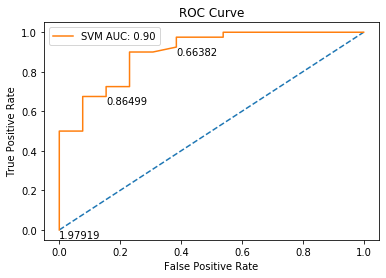

f1_score:
0.826066572902016
precision_score:
0.8186813186813187
accuracy_score:
0.8679245283018868
Confusion Matrix:
[[10  3]
 [ 4 36]]
              precision    recall  f1-score   support

           0       0.71      0.77      0.74        13
           1       0.92      0.90      0.91        40

    accuracy                           0.87        53
   macro avg       0.82      0.83      0.83        53
weighted avg       0.87      0.87      0.87        53



In [34]:
plot_roc(y_test1, probs_svm, 'SVM')

matrix_info(0.7521, y_test1, probs_svm)

In [25]:
params = {
    'n_estimators': [100, 200,500,1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [None,1,10,50,100]
}

In [31]:
X_train.shape

(265, 22)

In [32]:
params = {
    'n_estimators': [100, 200,500,1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [None,1,10,50,100]
}

clf = ensemble.RandomForestClassifier(n_jobs = -1, random_state=42)
cv = GridSearchCV(clf, param_grid=params, scoring='accuracy', n_jobs=-1, verbose=10, refit='accuracy', cv=5)
cv.fit(X_train,Y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:   15.3s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   17.9s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:   20.7s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   24.0s
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:   27.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   31.0s
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:   35.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=-1,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_

In [33]:
cv_results = pd.DataFrame(cv.cv_results_)
print("best params: ", cv_results.sort_values('rank_test_score')['params'][0])
cv_results.sort_values('rank_test_score')

best params:  {'max_depth': None, 'max_features': 'auto', 'n_estimators': 100}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
49,1.018810,0.073388,0.143128,0.058547,100,auto,200,"{'max_depth': 100, 'max_features': 'auto', 'n_...",0.811321,0.849057,0.905660,0.754717,0.867925,0.837736,0.051465,1
37,1.002154,0.126105,0.114892,0.004420,50,auto,200,"{'max_depth': 50, 'max_features': 'auto', 'n_e...",0.811321,0.849057,0.905660,0.754717,0.867925,0.837736,0.051465,1
38,1.738938,0.070334,0.216327,0.006622,50,auto,500,"{'max_depth': 50, 'max_features': 'auto', 'n_e...",0.811321,0.867925,0.905660,0.754717,0.849057,0.837736,0.051465,1
41,0.940424,0.211519,0.121947,0.007526,50,sqrt,200,"{'max_depth': 50, 'max_features': 'sqrt', 'n_e...",0.811321,0.849057,0.905660,0.754717,0.867925,0.837736,0.051465,1
42,1.775289,0.154974,0.223256,0.007041,50,sqrt,500,"{'max_depth': 50, 'max_features': 'sqrt', 'n_e...",0.811321,0.867925,0.905660,0.754717,0.849057,0.837736,0.051465,1
45,1.063565,0.219058,0.152061,0.049702,50,log2,200,"{'max_depth': 50, 'max_features': 'log2', 'n_e...",0.811321,0.849057,0.905660,0.754717,0.867925,0.837736,0.051465,1
46,1.948044,0.167009,0.223195,0.004700,50,log2,500,"{'max_depth': 50, 'max_features': 'log2', 'n_e...",0.811321,0.867925,0.905660,0.754717,0.849057,0.837736,0.051465,1
50,1.740923,0.030529,0.214445,0.004103,100,auto,500,"{'max_depth': 100, 'max_features': 'auto', 'n_...",0.811321,0.867925,0.905660,0.754717,0.849057,0.837736,0.051465,1
10,1.808949,0.091319,0.228399,0.014376,None,log2,500,"{'max_depth': None, 'max_features': 'log2', 'n...",0.811321,0.867925,0.905660,0.754717,0.849057,0.837736,0.051465,1
58,1.736423,0.182941,0.219172,0.004713,100,log2,500,"{'max_depth': 100, 'max_features': 'log2', 'n_...",0.811321,0.867925,0.905660,0.754717,0.849057,0.837736,0.051465,1


In [35]:
params = {
    'C': [0.1, 0.5, 1, 5], 
    'kernel': ['rbf', 'linear'], 
    'degree': [2, 3, 7, 10],
    'gamma': np.power(5, np.linspace(-2,5, 10)),
    'max_iter': [100000]
}

svc = SVC()
cv = GridSearchCV(svc, param_grid=params, scoring='accuracy', n_jobs=-1, verbose=20, refit='accuracy', cv=5)
cv.fit(X_train,Y_train)

Fitting 5 folds for each of 320 candidates, totalling 1600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0336s.) Setting batch_size=10.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  14 ta

[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 1236 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 1256 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 1266 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 1276 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 1286 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 1296 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 1306 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 1316 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 1326 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 1336 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 1346 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 1356 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 1366 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 1376 tasks      | elapsed: 

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.1, 0.5, 1, 5], 'degree': [2, 3, 7, 10],
                         'gamma': array([4.00000000e-02, 1.39863157e-01, 4.89042570e-01, 1.70997595e+00,
       5.97906587e+00, 2.09062758e+01, 7.31004435e+01, 2.55601471e+02,
       8.93730718e+02, 3.12500000e+03]),
                         'kernel': ['rbf', 'linear'], 'max_iter': [100000]},
             pre_dispatch='2*n_jobs', refit='accuracy',
             return_train_score=False, scoring='accuracy', verbose=20)

In [36]:
cv_results = pd.DataFrame(cv.cv_results_)
print("best params: ", cv_results.sort_values('rank_test_score')['params'][0])
cv_results.sort_values('rank_test_score')

best params:  {'C': 0.1, 'degree': 2, 'gamma': 0.04, 'kernel': 'rbf', 'max_iter': 100000}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_degree,param_gamma,param_kernel,param_max_iter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
226,0.006472,0.001552,0.000843,0.000724,1,10,1.70998,rbf,100000,"{'C': 1, 'degree': 10, 'gamma': 1.709975946676...",0.792453,0.867925,0.905660,0.773585,0.867925,0.841509,0.050062,1
92,0.013638,0.001110,0.003944,0.002598,0.5,2,73.1004,rbf,100000,"{'C': 0.5, 'degree': 2, 'gamma': 73.1004434553...",0.773585,0.886792,0.886792,0.792453,0.867925,0.841509,0.048619,1
166,0.007785,0.001040,0.001684,0.000586,1,2,1.70998,rbf,100000,"{'C': 1, 'degree': 2, 'gamma': 1.7099759466766...",0.792453,0.867925,0.905660,0.773585,0.867925,0.841509,0.050062,1
90,0.008969,0.001088,0.002383,0.001353,0.5,2,20.9063,rbf,100000,"{'C': 0.5, 'degree': 2, 'gamma': 20.9062757737...",0.773585,0.886792,0.886792,0.792453,0.867925,0.841509,0.048619,1
88,0.010198,0.001829,0.002096,0.000525,0.5,2,5.97907,rbf,100000,"{'C': 0.5, 'degree': 2, 'gamma': 5.97906587250...",0.773585,0.886792,0.886792,0.792453,0.867925,0.841509,0.048619,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52,0.012134,0.002148,0.002368,0.000566,0.1,7,73.1004,rbf,100000,"{'C': 0.1, 'degree': 7, 'gamma': 73.1004434553...",0.773585,0.792453,0.792453,0.792453,0.792453,0.788679,0.007547,293
70,0.008082,0.001803,0.003068,0.002109,0.1,10,20.9063,rbf,100000,"{'C': 0.1, 'degree': 10, 'gamma': 20.906275773...",0.773585,0.792453,0.792453,0.792453,0.792453,0.788679,0.007547,293
72,0.011067,0.002669,0.002981,0.001821,0.1,10,73.1004,rbf,100000,"{'C': 0.1, 'degree': 10, 'gamma': 73.100443455...",0.773585,0.792453,0.792453,0.792453,0.792453,0.788679,0.007547,293
32,0.010544,0.003878,0.003096,0.001840,0.1,3,73.1004,rbf,100000,"{'C': 0.1, 'degree': 3, 'gamma': 73.1004434553...",0.773585,0.792453,0.792453,0.792453,0.792453,0.788679,0.007547,293


In [97]:
parameters = {'solver': ['lbfgs','sgd','adam'], 
              'activation': ['relu'],
              'max_iter': [10000], 
              'alpha': 10.0 ** -np.arange(1, 10), 
              'hidden_layer_sizes':[(10,1),(16,16),(10,10),(8,8),(8,1),(1,8),(1,10)]}
cv = GridSearchCV(MLPClassifier(), parameters, n_jobs=-1, cv = 5, verbose = 10)
cv.fit(x_train1,y_train1)

Fitting 5 folds for each of 189 candidates, totalling 945 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   17.7s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:   19.9s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   22.0s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:   24.3s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   26.1s
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:   30.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   34.1s
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:   37.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_iter=200,
                                     momentum=0.9, n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_sta...
                                     warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'activation': ['relu'],
                         'alpha': array([1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06, 1.e-07, 1.e-08,
       1.e-09]),
                         'hidden_layer_sizes': [(10, 1), 

In [98]:
cv_results = pd.DataFrame(cv.cv_results_)
print("best params: ", cv_results.sort_values('rank_test_score').reset_index()['params'][2])
cv_results.sort_values('rank_test_score')

best params:  {'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (16, 16), 'max_iter': 10000, 'solver': 'lbfgs'}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_alpha,param_hidden_layer_sizes,param_max_iter,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
52,3.057564,0.364244,0.001197,3.992320e-04,relu,0.001,"(8, 8)",10000,sgd,"{'activation': 'relu', 'alpha': 0.001, 'hidden...",0.892857,0.846154,0.923077,0.884615,0.884615,0.886364,0.024374,1
98,3.024039,1.266820,0.000997,5.352484e-07,relu,1e-05,"(8, 1)",10000,adam,"{'activation': 'relu', 'alpha': 1e-05, 'hidden...",0.892857,0.884615,0.846154,0.884615,0.884615,0.878788,0.016487,2
3,1.339873,0.399924,0.000999,3.021056e-06,relu,0.1,"(16, 16)",10000,lbfgs,"{'activation': 'relu', 'alpha': 0.1, 'hidden_l...",0.892857,0.884615,0.846154,0.884615,0.884615,0.878788,0.016487,2
151,2.489046,0.533186,0.000995,4.741114e-06,relu,1e-08,"(16, 16)",10000,sgd,"{'activation': 'relu', 'alpha': 1e-08, 'hidden...",0.892857,0.807692,0.923077,0.846154,0.884615,0.871212,0.039787,4
113,1.850755,0.420271,0.000997,6.031566e-07,relu,1e-06,"(10, 10)",10000,adam,"{'activation': 'relu', 'alpha': 1e-06, 'hidden...",0.892857,0.807692,0.846154,0.923077,0.884615,0.871212,0.039787,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,1.138268,0.483264,0.000997,7.539457e-07,relu,0.0001,"(10, 1)",10000,sgd,"{'activation': 'relu', 'alpha': 0.0001, 'hidde...",0.750000,0.769231,0.769231,0.769231,0.769231,0.765152,0.007862,173
0,0.039308,0.005731,0.002194,1.933659e-03,relu,0.1,"(10, 1)",10000,lbfgs,"{'activation': 'relu', 'alpha': 0.1, 'hidden_l...",0.750000,0.769231,0.769231,0.769231,0.769231,0.765152,0.007862,173
79,1.674573,1.134970,0.001197,9.772819e-04,relu,0.0001,"(1, 8)",10000,sgd,"{'activation': 'relu', 'alpha': 0.0001, 'hidde...",0.750000,0.769231,0.730769,0.769231,0.769231,0.757576,0.015297,187
160,0.665472,0.715264,0.000997,4.101908e-07,relu,1e-08,"(8, 1)",10000,sgd,"{'activation': 'relu', 'alpha': 1e-08, 'hidden...",0.750000,0.769231,0.769231,0.769231,0.692308,0.750000,0.029566,188


In [58]:
MLPClassifier?

In [60]:
cv_results = pd.DataFrame(cv.cv_results_)
print("best params: ", cv_results.sort_values('rank_test_score').reset_index()['params'][2])
cv_results.sort_values('rank_test_score')

best params:  {'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (1, 10), 'max_iter': 10000, 'solver': 'adam'}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_alpha,param_hidden_layer_sizes,param_max_iter,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
125,0.637229,0.229419,0.002403,0.004805,relu,1e-06,"(1, 10)",10000,adam,"{'activation': 'relu', 'alpha': 1e-06, 'hidden...",0.792453,0.924528,0.886792,0.792453,0.886792,0.856604,0.054161,1
149,0.911424,0.554456,0.000201,0.000401,relu,1e-08,"(10, 1)",10000,adam,"{'activation': 'relu', 'alpha': 1e-08, 'hidden...",0.811321,0.867925,0.924528,0.792453,0.867925,0.852830,0.046829,2
20,1.110193,0.206377,0.001116,0.001579,relu,0.1,"(1, 10)",10000,adam,"{'activation': 'relu', 'alpha': 0.1, 'hidden_l...",0.792453,0.886792,0.886792,0.792453,0.886792,0.849057,0.046217,3
179,1.857217,0.697603,0.001007,0.001563,relu,1e-09,"(8, 8)",10000,adam,"{'activation': 'relu', 'alpha': 1e-09, 'hidden...",0.773585,0.849057,0.924528,0.792453,0.886792,0.845283,0.056478,4
8,1.538059,0.216539,0.001201,0.001474,relu,0.1,"(10, 10)",10000,adam,"{'activation': 'relu', 'alpha': 0.1, 'hidden_l...",0.792453,0.867925,0.905660,0.773585,0.886792,0.845283,0.052560,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,1.069682,1.091389,0.000801,0.001602,logistic,0.0001,"(8, 8)",10000,lbfgs,"{'activation': 'logistic', 'alpha': 0.0001, 'h...",0.716981,0.849057,0.849057,0.641509,0.735849,0.758491,0.080405,374
57,0.234216,0.097450,0.000000,0.000000,relu,0.001,"(1, 8)",10000,lbfgs,"{'activation': 'relu', 'alpha': 0.001, 'hidden...",0.792453,0.849057,0.679245,0.584906,0.867925,0.754717,0.107398,375
264,0.356208,0.287544,0.000200,0.000399,logistic,0.0001,"(8, 1)",10000,lbfgs,"{'activation': 'logistic', 'alpha': 0.0001, 'h...",0.679245,0.830189,0.849057,0.622642,0.773585,0.750943,0.087202,376
357,0.107687,0.039689,0.001335,0.001389,logistic,1e-09,"(10, 1)",10000,lbfgs,"{'activation': 'logistic', 'alpha': 1e-09, 'hi...",0.735849,0.811321,0.773585,0.641509,0.792453,0.750943,0.060141,376
